In [1]:
import pandas as pd
import numpy as np
import researchpy as rp
import math
import seaborn as sns
import matplotlib.pyplot as plt

## Organizing dataframe

### Data Cleaning

In [2]:
# Read in data for cse department
df_cse_rec = pd.read_csv("jacobs_capes/cse_capes.csv", usecols= ['Instructor','Rcmnd Instr'])
df_cse_grade = pd.read_csv("jacobs_capes/cse_capes.csv", usecols= ['Instructor','Avg Grade Expected', 'Avg Grade Received'])

# Change percent reccomend to decimal
df_cse_rec['Rcmnd Instr'] = df_cse_rec['Rcmnd Instr'].str.rstrip('%').astype('float') / 100.0

# Array with women professors
women_profs = ['Heninger, Nadia A', 'Rosing, Tajana Simunic', 'Chaudhuri, Kamalika', 'Alvarado, Christine J.', 'Minnes Kemp, Mor Mia', 'Polikarpova, Nadezhda', 'Esmaeilzadeh, Hadi', 'Riek, Laurel D', 'Gymrek, Melissa Ann', 'Chaudhuri, Kamalika', 'Nakashole, Ndapandula', 'Zaitsev, Anna L', 'Altintas De Callaf, Ilkay', 'Zhang, Yiying', 'Zhao, Jishen', 'Zhou, Yuan-Yuan']

In [3]:
# Drop null values
df_cse_rec = df_cse_rec.dropna()
df_cse_grade = df_cse_grade.dropna()

# Rename columns for convenience
df_cse_rec = df_cse_rec.rename(columns={"Instructor":"prof", "Rcmnd Instr":"rec_percent", "Gender": "gender"})
df_cse_grade = df_cse_grade.rename(columns={"Instructor":"prof","Avg Grade Expected": "expected", "Avg Grade Received": "received"})

In [4]:
df_cse_rec.head()

,prof,rec_percent
0,"Moshiri, Alexander Niema",0.983
1,"Kane, Daniel Mertz",0.946
2,"Jones, Miles E",0.961
3,"Meyer, Kyle Phillip",0.530
4,"Meyer, Kyle Phillip",0.630


In [5]:
df_cse_grade.head()

,prof,expected,received
0,"Moshiri, Alexander Niema",A- (3.70),B+ (3.61)
1,"Kane, Daniel Mertz",B+ (3.69),B+ (3.35)
2,"Jones, Miles E",B+ (3.57),B+ (3.45)
3,"Meyer, Kyle Phillip",B+ (3.53),B+ (3.46)
4,"Meyer, Kyle Phillip",B+ (3.61),B+ (3.54)


In [6]:
# Split function to get grade numerical value
def split_func(x) : 
    return(float(x.split('(')[1][:-1]))

In [7]:
# Split expected and received in order to extract grade value as decimal
df_cse_grade['value_e'] = df_cse_grade['expected'].apply(split_func)
df_cse_grade['value_r'] = df_cse_grade['received'].apply(split_func)
df_cse_grade = df_cse_grade.drop(columns=['expected', 'received'])
df_cse_grade = df_cse_grade.rename(columns={'value_e':'expected', 'value_r':'received'})

In [8]:
df_cse_grade

,prof,expected,received
0,"Moshiri, Alexander Niema",3.70,3.61
1,"Kane, Daniel Mertz",3.69,3.35
2,"Jones, Miles E",3.57,3.45
3,"Meyer, Kyle Phillip",3.53,3.46
4,"Meyer, Kyle Phillip",3.61,3.54
...,...,...,...
2379,"Kube, Paul Richard",3.41,3.01
2380,"Kube, Paul Richard",3.50,2.98
2381,"Dasgupta, Sanjoy",3.50,3.13
2382,"Jhala, Ranjit",3.13,2.64


In [9]:
# Average out recommend percent for all classes professor has taught
df_cse_rec_avg = df_cse_rec.groupby('prof', as_index=False).mean()

#Average out expected & recieved grade for all classes professor has taught
df_cse_grade = df_cse_grade.groupby('prof', as_index=False).mean()

# Add column for gender for professor in both dataframes
df_cse_rec_avg['gender'] = np.where(df_cse_rec_avg['prof'].isin(women_profs), "W", "M")
df_cse_grade['gender'] = np.where(df_cse_grade['prof'].isin(women_profs), "W", "M")

In [10]:
df_cse_rec_avg.head()

,prof,rec_percent,gender
0,"Aksanli, Baris",1.000000,M
1,"Allos, Haytham Issa",0.815333,M
2,"Altintas De Callaf, Ilkay",0.794484,W
3,"Alvarado, Christine J.",0.975818,W
4,"Anderson, James W.",0.600000,M


In [11]:
df_cse_grade.head()

,prof,expected,received,gender
0,"Aksanli, Baris",3.180000,2.840000,M
1,"Allos, Haytham Issa",3.543333,3.268333,M
2,"Altintas De Callaf, Ilkay",3.511667,3.248333,W
3,"Alvarado, Christine J.",3.531429,3.124524,W
4,"Arsanjani, Ali Paul",3.255000,3.055000,M


### Descriptive Stats

#### CSE Recommendation

In [12]:
df_cse_rec_avg['gender'].value_counts()

M    202
W     15
Name: gender, dtype: int64

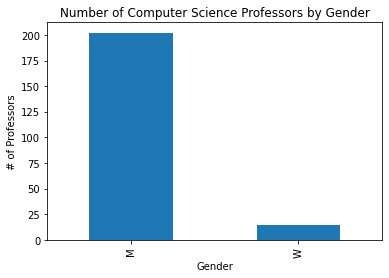

In [13]:
# Bar graphs with numbers of woman professors and men professors in CSE department
ax_cse_count = df_cse_rec_avg['gender'].value_counts().plot.bar()
plt.xlabel('Gender')
plt.ylabel('# of Professors')
ax_cse_count.set_title('Number of Computer Science Professors by Gender')
f1 = plt.gcf()

Text(0, 0.5, 'Ratio Recommend Professor')

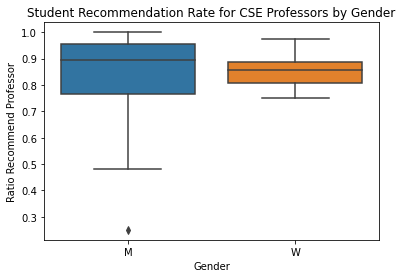

In [14]:
# Box Plots to see range of expected grades for professors base on gender
ax_cse_rec_box = sns.boxplot(x="gender", y="rec_percent", data=df_cse_rec_avg)
ax_cse_rec_box.set_title('Student Recommendation Rate for CSE Professors by Gender')
plt.xlabel('Gender')
plt.ylabel('Ratio Recommend Professor')

#### Expected vs Received Grade

Text(0, 0.5, 'Expected Grade for Professor')

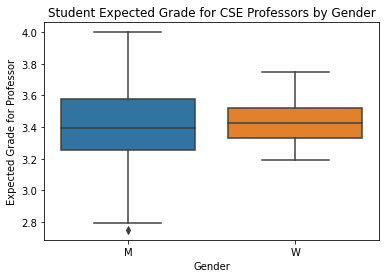

In [15]:
# Box Plots to see range of expected grades for professors base on gender
ax_cse_e_box = sns.boxplot(x="gender", y="expected", data=df_cse_grade)
ax_cse_e_box.set_title('Student Expected Grade for CSE Professors by Gender')
plt.xlabel('Gender')
plt.ylabel('Expected Grade for Professor')

Text(0, 0.5, 'Received Grade for Professor')

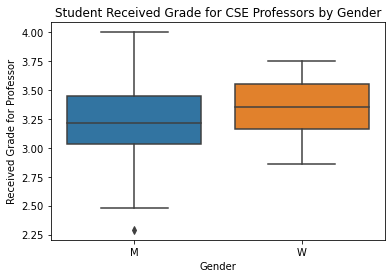

In [16]:
# Box Plots to see range of received grades for professors base on gender
ax_cse_r_box = sns.boxplot(x="gender", y="received", data=df_cse_grade)
ax_cse_r_box.set_title('Student Received Grade for CSE Professors by Gender')
plt.xlabel('Gender')
plt.ylabel('Received Grade for Professor')

In [17]:
# Percent difference between expected - received 
df_cse_grade['per_dif'] = ((df_cse_grade['expected']-df_cse_grade['received'])/df_cse_grade['expected'])*100

Text(0, 0.5, 'Percent Difference')

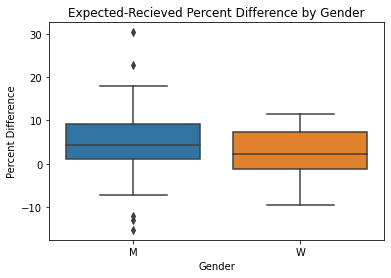

In [18]:
# Box Plots to see range of received grades for professors base on gender
ax_cse_dif_box = sns.boxplot(x="gender", y='per_dif', data=df_cse_grade)
ax_cse_dif_box.set_title('Expected-Recieved Percent Difference by Gender')
plt.xlabel('Gender')
plt.ylabel('Percent Difference')

### Z-test

https://www.statisticshowto.com/probability-and-statistics/hypothesis-testing/z-test/

##### Defining recommended: > 75

In [19]:
#z-test
df_cse_rec_avg['gender'].value_counts()

M    202
W     15
Name: gender, dtype: int64

In [20]:
num_women = 188
num_men = 2214

#num women recommended/total women
p1 = 163/num_women
p2 = 1741/num_men
print("P1: ", p1)
print("P2: ", p2)

P1:  0.8670212765957447
P2:  0.7863595302619693


In [21]:
#overall proportion
p = (163+1741)/(188+2214)
print("P: ", p)

P:  0.7926727726894255


In [22]:
df_cse_rec_avg.loc[(df_cse_rec_avg['rec_percent'] > 0.75) & (df_cse_rec_avg['gender'] == "W")] 

,prof,rec_percent,gender
2,"Altintas De Callaf, Ilkay",0.794484,W
3,"Alvarado, Christine J.",0.975818,W
30,"Chaudhuri, Kamalika",0.857083,W
74,"Gymrek, Melissa Ann",0.967333,W
76,"Heninger, Nadia A",0.862500,W
131,"Minnes Kemp, Mor Mia",0.963659,W
138,"Nakashole, Ndapandula",0.827333,W
153,"Polikarpova, Nadezhda",0.856000,W
163,"Riek, Laurel D",0.904667,W
164,"Rosing, Tajana Simunic",0.783318,W


In [23]:
#z-test formula
z = ((p1-p2)-0)/math.sqrt((p*(1-p))*((1/num_women)+(1/num_men)))
z

2.6192304518614566

In [24]:
# z-score associated with a 5% alpha level / 2 is 1.96.
# 2.619 > 1.96, reject the null hypothesis (so proportions are not the same)

### T-test

https://www.statisticshowto.com/probability-and-statistics/t-test/ 

https://www.statisticshowto.com/probability-and-statistics/t-distribution/independent-samples-t-test/

### *Hypothesis Testing*

#### Recommendation Percent Rates
$H_o$: There is no difference between the recommendation rates of men and women professors

$H_a$: There is a difference between the recommendation rates of men and women professors

In [25]:
rp.ttest(group1= df_cse_rec_avg['rec_percent'][df_cse_rec_avg['gender'] == "W"], group1_name= "Woman",
         group2= df_cse_rec_avg['rec_percent'][df_cse_rec_avg['gender'] == "M"], group2_name= "Man")

(   Variable      N      Mean        SD        SE  95% Conf.  Interval
 0     Woman   15.0  0.857008  0.069371  0.017912   0.818592  0.895425
 1       Man  202.0  0.844769  0.144528  0.010169   0.824717  0.864820
 2  combined  217.0  0.845615  0.140568  0.009542   0.826807  0.864423,
             Independent t-test   results
 0  Difference (Woman - Man) =     0.0122
 1        Degrees of freedom =   215.0000
 2                         t =     0.3247
 3     Two side test p value =     0.7457
 4    Difference < 0 p value =     0.6271
 5    Difference > 0 p value =     0.3729
 6                 Cohen's d =     0.0869
 7                 Hedge's g =     0.0866
 8             Glass's delta =     0.1764
 9               Pearson's r =     0.0221)

Since we calculated the difference between women and men and the t-value was positive, the average  is greater for men professors than for woman professors.

Based on the degrees of freedom the t-value would need to be greater than 1.655 to be statistically significant.

Based on the results from the t-test, the t-value is at 0.3247 < 1.655, so the difference in recommended percents for men professors and women professors is not statistically significant at the 5% level.

### *Hypothesis Testing*

#### 'Expected - Received' Percent Value
$H_o$: There is no percent difference 'Expected - Received' between a men and women professors

$H_a$: There is a percent difference 'Expected - Received' between a men and women professors

In [31]:
rp.ttest(group1= df_cse_grade['per_dif'][df_cse_grade['gender'] == "W"], group1_name= "Woman",
         group2= df_cse_grade['per_dif'][df_cse_grade['gender'] == "M"], group2_name= "Man")

(   Variable      N      Mean        SD        SE  95% Conf.  Interval
 0     Woman   15.0  2.284417  6.359738  1.642077  -1.237488  5.806323
 1       Man  181.0  4.918007  6.290825  0.467593   3.995337  5.840677
 2  combined  196.0  4.716457  6.318767  0.451341   3.826321  5.606592,
             Independent t-test   results
 0  Difference (Woman - Man) =    -2.6336
 1        Degrees of freedom =   194.0000
 2                         t =    -1.5569
 3     Two side test p value =     0.1211
 4    Difference < 0 p value =     0.0606
 5    Difference > 0 p value =     0.9394
 6                 Cohen's d =    -0.4183
 7                 Hedge's g =    -0.4167
 8             Glass's delta =    -0.4141
 9               Pearson's r =     0.1111)

Since we calculated the difference between women and men and the t-value was negative, the average 'expected - received' percent value is greater for men professors than for woman professors.

Based on the degrees of freedom the t-value would need to be greater than -1.655 to be statistically significant.

However, based on the results from the t-test, the t-value is at -1.5569 > -1.655, so the difference in 'expected - received' percent value for men professors and women professors is not statistically significant at the 5% level.

## Contingency Table

In [26]:
import numpy as np
import pandas as pd
import matplotlib as plt

In [27]:
df_cse_rec_avg['rec'] = np.where(df_cse_rec_avg['rec_percent'] > 0.80, "Y", "N")

In [28]:
df_cse_rec_avg.head()

,prof,rec_percent,gender,rec
0,"Aksanli, Baris",1.000000,M,Y
1,"Allos, Haytham Issa",0.815333,M,Y
2,"Altintas De Callaf, Ilkay",0.794484,W,N
3,"Alvarado, Christine J.",0.975818,W,Y
4,"Anderson, James W.",0.600000,M,N


In [29]:
cse_table = pd.crosstab(df_cse_rec_avg['gender'],
                            df_cse_rec_avg['rec'], 
                               margins = False)
print(cse_table)

rec      N    Y
gender         
M       62  140
W        3   12
